<a href="https://colab.research.google.com/github/dreamtim1/Python-practice/blob/master/125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Download the data from [Spotify Top 50 Tracks of 2020 dataset](https://www.kaggle.com/atillacolak/top-50-spotify-tracks-2020)

In [ ]:
! kaggle datasets download -d atillacolak/top-50-spotify-tracks-2020


  0%|                                               | 0.00/4.40k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 4.40k/4.40k [00:00<00:00, 1.44MB/s]


In [ ]:
! unzip top-50-spotify-tracks-2020.zip -d .

Archive:  top-50-spotify-tracks-2020.zip
  inflating: ./spotifytoptracks.csv  


Load the data into DataFrame

In [ ]:
df = pd.read_csv('spotifytoptracks.csv', index_col=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   energy            50 non-null     float64
 5   danceability      50 non-null     float64
 6   key               50 non-null     int64  
 7   loudness          50 non-null     float64
 8   acousticness      50 non-null     float64
 9   speechiness       50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  valence           50 non-null     float64
 13  tempo             50 non-null     float64
 14  duration_ms       50 non-null     int64  
 15  genre             50 non-null     object 
dtypes: float64(9), int64(2), object(5)
memory usag

In [ ]:
df.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


Clean the data

In [ ]:
print(f'BEFORE removing missing values: {len(df)}')
df = df.dropna()
print(f'AFTER removing missing values: {len(df)}')
if not df.isnull().any().any():
    print('All is ok, there is no missing values!')

BEFORE removing missing values: 50
AFTER removing missing values: 50
All is ok, there is no missing values!


How many observations are there in this dataset? How many features this dataset has?

In [ ]:
row_num, col_num = df.shape
print(f'There are {row_num} observations each consisting of {col_num - 1} fields')

There are 50 observations each consisting of 15 fields


Check descriptive statistics to probably find something strange or impossible

In [ ]:
# From the dataset description
categories = ('artist', 'key', 'genre', 'album')

# Which of the features are categorical?
for col_name in categories:
    df[col_name] = df[col_name].astype('category')
    print(f'{col_name} is {df[col_name].dtype}')

artist is category
key is category
genre is category
album is category


Investigate the numeric features

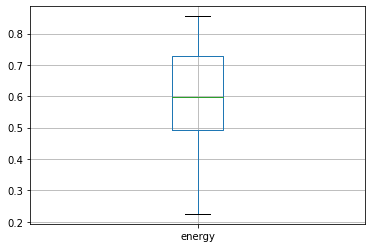

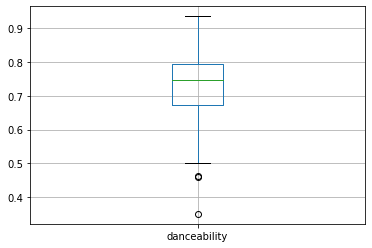

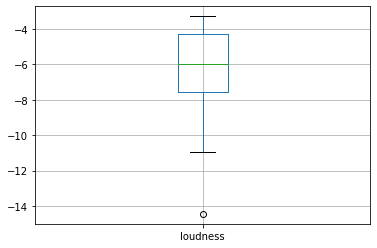

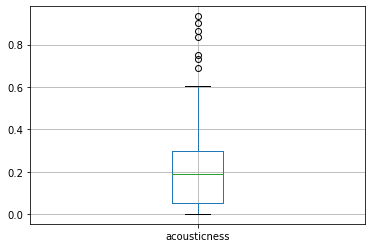

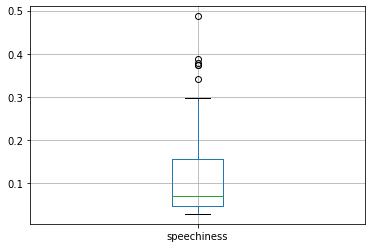

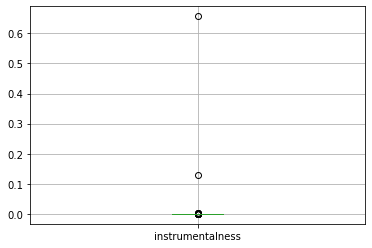

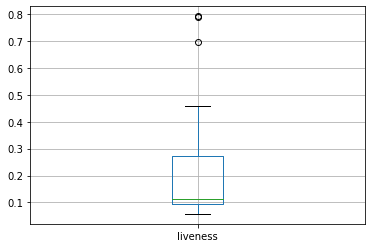

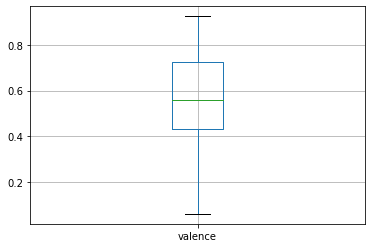

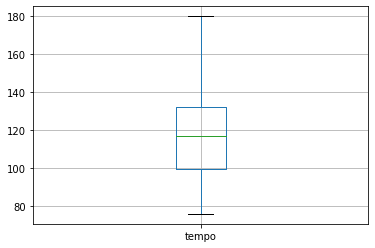

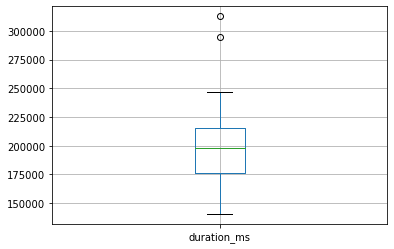

In [ ]:
# Which of the features are numeric?

# It's inefficient, because we calculate the statistics twice
# But it doesn't really matter, because the dataset is small
for col_name in df.describe().columns:
    df.boxplot(column=col_name)
    plt.show()

It looks like there are a lot of 0 in instrumentalness column. Probably, it's good idea to deal with it as a category (instrumental or not).

In [ ]:
print(f'> 0:    {np.count_nonzero(df.instrumentalness)}')
print(f'> 0.01: {np.count_nonzero(df.instrumentalness > 0.01)}')

> 0:    18
> 0.01: 2


Actually, there are a lot of values that a very close to 0. So, it is quetionable, can we really divide this data into 2 categories. Some domain knowledge about how this dataset was collected and what these numerical values actually mean can help. From the [discussion](https://www.kaggle.com/datasets/atillacolak/top-50-spotify-tracks-2020/discussion/) on Kaggle (message by the creator of the dataset):

There is a website called Spotify developers, here is the link to the website: https://developer.spotify.com/

After you create an account and do the needed steps, the website gives you an ID. Using that ID and spotipy( a python library for Spotify), you can pull data from any artist or playlist on Spotify, and this data that you pull from Spotify API has these numerical variables. In short, these values are determined by Spotify itself, so you don't have to worry about their credibility.

From useful [blog post](https://towardsdatascience.com/is-my-spotify-music-boring-an-analysis-involving-music-data-and-machine-learning-47550ae931de):

- Instrumentalness: This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.
- Acousticness: This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.
- Liveness: This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”.
- Speechiness: “Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.
- Energy: “(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”.
- Danceability: “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.
- Valence: “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.

So, let's create such category: instrumental (True) or not really (False). However, it isn't very useful in this case, because 2 values on one category is too small number to be meaningful.

In [ ]:
df['is_instrumental'] = (df.instrumentalness < 0.01).astype('category')
print(f'is_instrumental is {df.is_instrumental.dtype}')

is_instrumental is category


In [ ]:
# Check the outlier in loudness
df.iloc[df.loudness.idxmin()]

artist                       Billie Eilish
album                  everything i wanted
track_name             everything i wanted
track_id            3ZCTVFBt2Brf31RLEnCkWJ
energy                               0.225
danceability                         0.704
key                                      6
loudness                           -14.454
acousticness                         0.902
speechiness                         0.0994
instrumentalness                     0.657
liveness                             0.106
valence                              0.243
tempo                              120.006
duration_ms                         245426
genre                                  Pop
is_instrumental                      False
Name: 24, dtype: object

It looks like it is just Billie Eilish, there is nothing strange about it :)

Answer the quetions about the popular artists

In [ ]:
# How many artists in total have their songs in the top 50?
artists = df.groupby('artist').size()
print(f'{len(artists)} artists have their songs in the top 50')

40 artists have their songs in the top 50


In [ ]:
# Are there any artists that have more than 1 popular track? If yes, which and how many?
artists = artists[artists > 1]
print(f'{len(artists)} artists have more than 1 popular track:')
artists

7 artists have more than 1 popular track:


artist
Billie Eilish    3
Dua Lipa         3
Harry Styles     2
Justin Bieber    2
Lewis Capaldi    2
Post Malone      2
Travis Scott     3
dtype: int64

In [ ]:
# Who was the most popular artist?
artists[artists == artists.max()]

artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
dtype: int64

Answer the questions about the albums

In [ ]:
# How many albums in total have their songs in the top 50?
albums = df.groupby('album').size()
print(f'{len(albums)} albums have their songs in the top 50')

45 albums have their songs in the top 50


In [ ]:
# Are there any albums that have more than 1 popular track? If yes, which and how many?
albums = albums[albums > 1]
print(f'{len(albums)} albums have more than 1 popular track:')
albums

4 albums have more than 1 popular track:


album
Changes                 2
Fine Line               2
Future Nostalgia        3
Hollywood's Bleeding    2
dtype: int64

Analyzing numerical features: danceability, loudness, duration

In [ ]:
# Which tracks have a danceability score above 0.7?
df[df.danceability > 0.7]

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre,is_instrumental
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie,True
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap,True
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic,True
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco,True
5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.690,0.746,11,-7.956,0.24700,0.1640,0.000000,0.1010,0.497,89.977,181733,Hip-Hop/Rap,True
7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,0.431,0.726,8,-8.765,0.73100,0.1350,0.000000,0.6960,0.348,144.026,173333,Hip-Hop/Rap,True
8,Trevor Daniel,Nicotine,Falling,2rRJrJEo19S2J82BDsQ3F7,0.430,0.784,10,-8.756,0.12300,0.0364,0.000000,0.0887,0.236,127.087,159382,R&B/Hip-Hop alternative,True
10,KAROL G,Tusa,Tusa,7k4t7uLgtOxPwTpFmtJNTY,0.715,0.803,2,-3.280,0.29500,0.2980,0.000134,0.0574,0.574,101.085,200960,Pop,True
13,Lil Mosey,Certified Hitmaker,Blueberry Faygo,22LAwLoDA5b4AaGSkg6bKW,0.554,0.774,0,-7.909,0.20700,0.0383,0.000000,0.1320,0.349,99.034,162547,Hip-Hop/Rap,True
14,Justin Bieber,Changes,Intentions (feat. Quavo),4umIPjkehX1r7uhmGvXiSV,0.546,0.806,9,-6.637,0.30000,0.0575,0.000000,0.1020,0.874,147.986,212867,Pop,True


In [ ]:
# Which tracks have a danceability score below 0.4?
df[df.danceability < 0.4]

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre,is_instrumental
44,Billie Eilish,lovely (with Khalid),lovely (with Khalid),0u2P5u6lvoDfwTYjAADbn4,0.296,0.351,4,-10.109,0.934,0.0333,0.0,0.095,0.12,115.284,200186,Chamber pop,True


In [ ]:
# Which tracks have their loudness above -5?
df[df.loudness > -5]

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre,is_instrumental
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco,True
6,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0.816,0.548,0,-4.209,0.12200,0.0465,0.000000,0.3350,0.557,95.390,174000,Pop,True
10,KAROL G,Tusa,Tusa,7k4t7uLgtOxPwTpFmtJNTY,0.715,0.803,2,-3.280,0.29500,0.2980,0.000134,0.0574,0.574,101.085,200960,Pop,True
12,Post Malone,Hollywood's Bleeding,Circles,21jGcNKet2qwijlDFuPiPb,0.762,0.695,0,-3.497,0.19200,0.0395,0.002440,0.0863,0.553,120.042,215280,Pop/Soft Rock,True
16,Lewis Capaldi,Divinely Uninspired To A Hellish Extent (Exten...,Before You Go,2gMXnyrvIjhVBUZwvLZDMP,0.575,0.459,3,-4.858,0.60400,0.0573,0.000000,0.0885,0.183,111.881,215107,Alternative/Indie,True
17,Doja Cat,Hot Pink,Say So,3Dv1eDb0MEgF93GpLXlucZ,0.673,0.787,11,-4.577,0.25600,0.1580,0.000004,0.0904,0.786,110.962,237893,R&B/Soul,True
21,Harry Styles,Fine Line,Adore You,3jjujdWJ72nww5eGnfs2E7,0.771,0.676,8,-3.675,0.02370,0.0483,0.000007,0.1020,0.569,99.048,207133,Pop,True
23,24kGoldn,Mood (feat. iann dior),Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,0.722,0.700,7,-3.558,0.22100,0.0369,0.000000,0.2720,0.756,90.989,140526,Pop rap,True
31,Dua Lipa,Future Nostalgia,Break My Heart,017PF4Q3l4DBUiWoXk4OWT,0.729,0.730,4,-3.434,0.16700,0.0883,0.000001,0.3490,0.467,113.013,221820,Dance-pop/Disco,True
32,BTS,Dynamite (DayTime Version),Dynamite,0t1kP63rueHleOhQkYSXFY,0.765,0.746,6,-4.410,0.01120,0.0993,0.000000,0.0936,0.737,114.044,199054,Disco-pop,True


In [ ]:
# Which tracks have their loudness below -8?
df[df.loudness < -8]

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre,is_instrumental
7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,0.431,0.726,8,-8.765,0.7310,0.1350,0.000000,0.6960,0.3480,144.026,173333,Hip-Hop/Rap,True
8,Trevor Daniel,Nicotine,Falling,2rRJrJEo19S2J82BDsQ3F7,0.430,0.784,10,-8.756,0.1230,0.0364,0.000000,0.0887,0.2360,127.087,159382,R&B/Hip-Hop alternative,True
15,Drake,Dark Lane Demo Tapes,Toosie Slide,466cKvZn1j45IpxDdYZqdA,0.490,0.830,1,-8.820,0.2890,0.2090,0.000003,0.1130,0.8450,81.604,247059,Hip-Hop/Rap,True
20,Jawsh 685,Savage Love (Laxed - Siren Beat),Savage Love (Laxed - Siren Beat),1xQ6trAsedVPCdbtDAmk0c,0.481,0.767,0,-8.520,0.2340,0.0803,0.000000,0.2690,0.7610,150.076,171375,Hip-Hop/Rap,True
24,Billie Eilish,everything i wanted,everything i wanted,3ZCTVFBt2Brf31RLEnCkWJ,0.225,0.704,6,-14.454,0.9020,0.0994,0.657000,0.1060,0.2430,120.006,245426,Pop,False
26,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",bad guy,2Fxmhks0bxGSBdJ92vM42m,0.425,0.701,7,-10.965,0.3280,0.3750,0.130000,0.1000,0.5620,135.128,194088,Electro-pop,False
36,Travis Scott,HIGHEST IN THE ROOM,HIGHEST IN THE ROOM,3eekarcy7kvN4yt5ZFzltW,0.427,0.598,7,-8.764,0.0546,0.0317,0.000006,0.2100,0.0605,76.469,175721,Hip-Hop/Rap,True
44,Billie Eilish,lovely (with Khalid),lovely (with Khalid),0u2P5u6lvoDfwTYjAADbn4,0.296,0.351,4,-10.109,0.9340,0.0333,0.000000,0.0950,0.1200,115.284,200186,Chamber pop,True
47,JP Saxe,If the World Was Ending (feat. Julia Michaels),If the World Was Ending - feat. Julia Michaels,2kJwzbxV2ppxnQoYw4GLBZ,0.473,0.464,1,-10.086,0.8660,0.1290,0.000000,0.1090,0.6040,75.801,208687,Pop,True


In [ ]:
# Which track is the longest?
df.iloc[df.duration_ms.idxmax()]

artist                        Travis Scott
album                           ASTROWORLD
track_name                      SICKO MODE
track_id            2xLMifQCjDGFmkHkpNLD9h
energy                                0.73
danceability                         0.834
key                                      8
loudness                            -3.714
acousticness                       0.00513
speechiness                          0.222
instrumentalness                       0.0
liveness                             0.124
valence                              0.446
tempo                              155.008
duration_ms                         312820
genre                          Hip-Hop/Rap
is_instrumental                       True
Name: 49, dtype: object

In [ ]:
# Which track is the shortest?
df.iloc[df.duration_ms.idxmin()]

artist                            24kGoldn
album               Mood (feat. iann dior)
track_name          Mood (feat. iann dior)
track_id            3tjFYV6RSFtuktYl3ZtYcq
energy                               0.722
danceability                           0.7
key                                      7
loudness                            -3.558
acousticness                         0.221
speechiness                         0.0369
instrumentalness                       0.0
liveness                             0.272
valence                              0.756
tempo                               90.989
duration_ms                         140526
genre                              Pop rap
is_instrumental                       True
Name: 23, dtype: object

In [ ]:
# Which genre is the most popular?
genres = df.groupby('genre').size()
# We don't use just 
genres[genres == genres.max()]

genre
Pop    14
dtype: int64

In [ ]:
# Which genres have just one song on the top 50?
genres[genres == 1]

genre
Alternative/reggaeton/experimental    1
Chamber pop                           1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Hip-Hop/Trap                          1
Nu-disco                              1
Pop rap                               1
Pop/Soft Rock                         1
R&B/Hip-Hop alternative               1
dtype: int64

In [ ]:
# How many genres in total are represented in the top 50?
print(f'{len(genres)} genres are represented in the top 50')

16 genres are represented in the top 50


Explore correlations between the features

In [ ]:
correlations = df.corr()
correlations

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,1.000000,0.152552,0.791640,-0.682479,0.074267,-0.385515,0.069487,0.393453,0.075191,0.081971
danceability,0.152552,1.000000,0.167147,-0.359135,0.226148,-0.017706,-0.006648,0.479953,0.168956,-0.033763
loudness,0.791640,0.167147,1.000000,-0.498695,-0.021693,-0.553735,-0.069939,0.406772,0.102097,0.064130
acousticness,-0.682479,-0.359135,-0.498695,1.000000,-0.135392,0.352184,-0.128384,-0.243192,-0.241119,-0.010988
speechiness,0.074267,0.226148,-0.021693,-0.135392,1.000000,0.028948,-0.142957,0.053867,0.215504,0.366976
instrumentalness,-0.385515,-0.017706,-0.553735,0.352184,0.028948,1.000000,-0.087034,-0.203283,0.018853,0.184709
liveness,0.069487,-0.006648,-0.069939,-0.128384,-0.142957,-0.087034,1.000000,-0.033366,0.025457,-0.090188
valence,0.393453,0.479953,0.406772,-0.243192,0.053867,-0.203283,-0.033366,1.000000,0.045089,-0.039794
tempo,0.075191,0.168956,0.102097,-0.241119,0.215504,0.018853,0.025457,0.045089,1.000000,0.130328
duration_ms,0.081971,-0.033763,0.064130,-0.010988,0.366976,0.184709,-0.090188,-0.039794,0.130328,1.000000


In [ ]:
# Correlation coefficients with absolute values under 0.3 indicate variables
# which can be considered not correlated at all

correlations = correlations[correlations.abs() > 0.3]
correlations

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,1.000000,NaN,0.791640,-0.682479,NaN,-0.385515,NaN,0.393453,NaN,NaN
danceability,NaN,1.000000,NaN,-0.359135,NaN,NaN,NaN,0.479953,NaN,NaN
loudness,0.791640,NaN,1.000000,-0.498695,NaN,-0.553735,NaN,0.406772,NaN,NaN
acousticness,-0.682479,-0.359135,-0.498695,1.000000,NaN,0.352184,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.366976
instrumentalness,-0.385515,NaN,-0.553735,0.352184,NaN,1.000000,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
valence,0.393453,0.479953,0.406772,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
duration_ms,NaN,NaN,NaN,NaN,0.366976,NaN,NaN,NaN,NaN,1.000000


In [ ]:
# We don't care about the correlations between the same columns

np.fill_diagonal(correlations.values, np.nan)
correlations = correlations.dropna(how='all', axis='rows').dropna(how='all', axis='columns')
correlations

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,valence,duration_ms
energy,NaN,NaN,0.791640,-0.682479,NaN,-0.385515,0.393453,NaN
danceability,NaN,NaN,NaN,-0.359135,NaN,NaN,0.479953,NaN
loudness,0.791640,NaN,NaN,-0.498695,NaN,-0.553735,0.406772,NaN
acousticness,-0.682479,-0.359135,-0.498695,NaN,NaN,0.352184,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.366976
instrumentalness,-0.385515,NaN,-0.553735,0.352184,NaN,NaN,NaN,NaN
valence,0.393453,0.479953,0.406772,NaN,NaN,NaN,NaN,NaN
duration_ms,NaN,NaN,NaN,NaN,0.366976,NaN,NaN,NaN


In [ ]:
# Here we print a kind of report about the observed correlations
# We show not only correlation coefficients, but arameters of the regression

# We used such correlation coefficients "borders":
# Between 0.9 and 1.0 - variables which can be considered very highly correlated
# Between 0.7 and 0.9 - variables which can be considered highly correlated
# Between 0.5 and 0.7 - variables which can be considered moderately correlated
# Between 0.3 and 0.5 - variables which can be considered lowly correlated

from scipy.stats import linregress
from IPython.display import display

def define_corr_strength(coeff: int) -> str:
    coeff = np.abs(coeff)
    if coeff >= 0.9:
        return 'very highly'
    elif coeff >= 0.7:
        return 'highly'
    elif coeff >= 0.5:
        return 'moderately'
    elif coeff >= 0.3:
        return 'lowly'
    else:
        return 'NOT CORRELATED'

for col_name, col in correlations.iteritems():

    col = col.dropna()

    print(f'The {col_name} is correlated:')

    for feature, coeff in col.iteritems():
        strength = define_corr_strength(coeff)
        how = 'positively' if coeff > 0 else 'negatively'
        print(f'- {how} with {feature}, {strength} correlated')

    x = df.loc[:, col_name]
    param_names = ['slope', 'intercept', 'r_value', 'p_value', 'std_err']
    corr_detailed = pd.DataFrame(columns=param_names)

    print(f'Parameters of the correlations for the {col_name}:')

    for y_name in col.index:
        y = df.loc[:, y_name]
        corr_params = pd.DataFrame([linregress(x, y)], columns=param_names, index=[y_name])
        corr_detailed = pd.concat([corr_detailed, corr_params])
    
    display(corr_detailed)

The energy is correlated:
- positively with loudness, highly correlated
- negatively with acousticness, moderately correlated
- negatively with instrumentalness, lowly correlated
- positively with valence, lowly correlated
Parameters of the correlations for the energy:


,slope,intercept,r_value,p_value,std_err
loudness,12.051650,-13.568970,0.791640,7.674982e-12,1.342553
acousticness,-1.172853,0.970825,-0.682479,4.795623e-08,0.181299
instrumentalness,-0.235562,0.159490,-0.385515,5.695520e-03,0.081378
valence,0.551597,0.219622,0.393453,4.702157e-03,0.186031


The danceability is correlated:
- negatively with acousticness, lowly correlated
- positively with valence, lowly correlated
Parameters of the correlations for the danceability:


,slope,intercept,r_value,p_value,std_err
acousticness,-0.762236,0.802515,-0.359135,0.010428,0.285908
valence,0.831008,-0.039890,0.479953,0.000420,0.219245


The loudness is correlated:
- positively with energy, highly correlated
- negatively with acousticness, lowly correlated
- negatively with instrumentalness, moderately correlated
- positively with valence, lowly correlated
Parameters of the correlations for the loudness:


,slope,intercept,r_value,p_value,std_err
energy,0.052001,0.933051,0.791640,7.674982e-12,0.005793
acousticness,-0.056295,-0.094282,-0.498695,2.278077e-04,0.014123
instrumentalness,-0.022225,-0.122410,-0.553735,3.028091e-05,0.004824
valence,0.037459,0.788928,0.406772,3.373494e-03,0.012143


The acousticness is correlated:
- negatively with energy, moderately correlated
- negatively with danceability, lowly correlated
- negatively with loudness, lowly correlated
- positively with instrumentalness, lowly correlated
Parameters of the correlations for the acousticness:


,slope,intercept,r_value,p_value,std_err
energy,-0.397131,0.711047,-0.682479,4.795623e-08,0.061388
danceability,-0.169210,0.760072,-0.359135,1.042777e-02,0.063469
loudness,-4.417732,-5.094051,-0.498695,2.278077e-04,1.108285
instrumentalness,0.125222,-0.016121,0.352184,1.213251e-02,0.048032


The speechiness is correlated:
- positively with duration_ms, lowly correlated
Parameters of the correlations for the speechiness:


,slope,intercept,r_value,p_value,std_err
duration_ms,106779.667665,186697.810022,0.366976,0.008756,39068.0128


The instrumentalness is correlated:
- negatively with energy, lowly correlated
- negatively with loudness, moderately correlated
- positively with acousticness, lowly correlated
Parameters of the correlations for the instrumentalness:


,slope,intercept,r_value,p_value,std_err
energy,-0.630925,0.619371,-0.385515,0.005696,0.217960
loudness,-13.796121,-6.005687,-0.553735,0.000030,2.994467
acousticness,0.990515,0.240395,0.352184,0.012133,0.379939


The valence is correlated:
- positively with energy, lowly correlated
- positively with danceability, lowly correlated
- positively with loudness, lowly correlated
Parameters of the correlations for the valence:


,slope,intercept,r_value,p_value,std_err
energy,0.280650,0.453340,0.393453,0.004702,0.094652
danceability,0.277200,0.562677,0.479953,0.000420,0.073134
loudness,4.417145,-8.680552,0.406772,0.003373,1.431834


The duration_ms is correlated:
- positively with speechiness, lowly correlated
Parameters of the correlations for the duration_ms:


,slope,intercept,r_value,p_value,std_err
speechiness,0.000001,-0.128027,0.366976,0.008756,4.614436e-07


We can conclude, that the only strong correlation is observed between the energy and the loudness. It is pretty natural. However, it is a little bit strange, tha we don't see any correlation between the energy and the tempo or between other related feautures. Probably, 50 is too small sample size to detect it.

Now let's compare genres with simple statistics: t-test

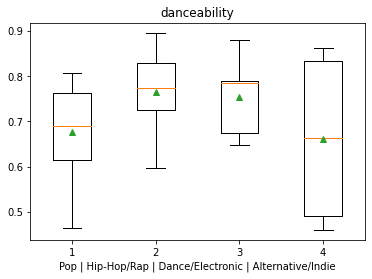

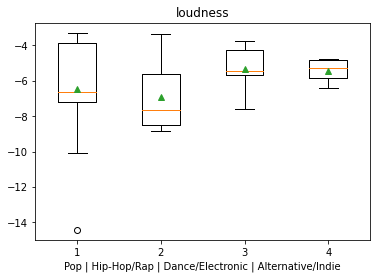

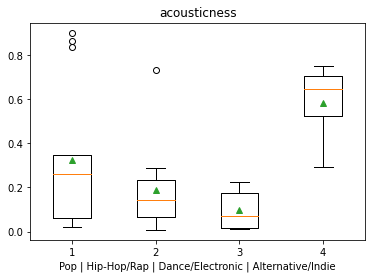

In [ ]:
genres = ('Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie')
properties = ('danceability', 'loudness', 'acousticness')

for property in properties:
    plt.boxplot([df[df.genre == genre][property] for genre in  genres], showmeans=True)
    plt.title(property)
    plt.xlabel(' | '.join(genres))
    plt.show()

# It would be cool to set the x-axis to genres
# But I am not familiar with vizualixations yet

It seems that Hip-Hop/Rap loudness differ from Dance/Electronic, Alternative/Indie acousticness deffer from Dance/Electronic and Hip-Hop/Rap. Let's check it with t-tests!

In [ ]:
# Check is the data is normally distributed
from scipy.stats import normaltest, shapiro

# Save the names of the samples we want to compare with each other
names_to_check = [
    ('Hip-Hop/Rap', 'loudness'),
    ('Dance/Electronic', 'loudness'),
    ('Alternative/Indie', 'acousticness'),
    ('Dance/Electronic', 'acousticness'),
    ('Hip-Hop/Rap', 'acousticness')
]

# Query the samples from the dataset
# Save in dict to do it just once
# Doesn't matter for our small dataset, but useful for large
data_to_check = {
    (genre, property):
    df[df.genre == genre][property] for genre, property in to_check
}

# Save the pairs of names for comparison 
pairs = [
    (names_to_check[0], names_to_check[1]),
    (names_to_check[2], names_to_check[3]),
    (names_to_check[2], names_to_check[4])
]

alpha = 0.05

In [ ]:
print('\nD’Agostino’s K^2 Test:\n')
for name in names_to_check:
    print(*name)

    try:
        results = normaltest(data_to_check[name])
        print(f'p-value: {results[1]}')
        if results[1] < alpha:
            print('Data is normally distributed!')

    except ValueError:
        print('Bad data for normaltest :(')
    
    print('-----')


D’Agostino’s K^2 Test:

Hip-Hop/Rap loudness
p-value: 0.3618403725692293
-----
Dance/Electronic loudness
Bad data for normaltest :(
-----
Alternative/Indie acousticness
Bad data for normaltest :(
-----
Dance/Electronic acousticness
Bad data for normaltest :(
-----
Hip-Hop/Rap acousticness
p-value: 8.006562581753919e-05
Data is normally distributed!
-----


In [ ]:
print('\nShapiro-Wilk Test:\n')
for name in names_to_check:
    print(*name)

    try:
        results = shapiro(data_to_check[name])
        print(f'p-value: {results[1]}')
        if results[1] < alpha:
            print('Data is normally distributed!')
    
    except ValueError:
        print('Bad data for shapiro :(')
    
    print('-----')


Shapiro-Wilk Test:

Hip-Hop/Rap loudness
p-value: 0.06353022903203964
-----
Dance/Electronic loudness
p-value: 0.6725137233734131
-----
Alternative/Indie acousticness
p-value: 0.30610811710357666
-----
Dance/Electronic acousticness
p-value: 0.24612893164157867
-----
Hip-Hop/Rap acousticness
p-value: 0.002642609179019928
Data is normally distributed!
-----


Unfortunately, we can't use t-test to compare the samples, only Hip-Hop/Rap acousticness is distributed normally :( Le't try nonparametric Mann-Whitney U test!

In [ ]:
from scipy.stats import mannwhitneyu

for name_1, name_2 in pairs:
    print(f'Compairing {name_1} and {name_2}:')
    
    results = mannwhitneyu(data_to_check[name_1], data_to_check[name_2])
    print(f'p-value: {results[1]}')

    if results[1] < alpha:
        print('Samples are significantly different!')
    
    print('-----')

Compairing ('Hip-Hop/Rap', 'loudness') and ('Dance/Electronic', 'loudness'):
p-value: 0.14332399626517275
-----
Compairing ('Alternative/Indie', 'acousticness') and ('Dance/Electronic', 'acousticness'):
p-value: 0.015873015873015872
Samples are significantly different!
-----
Compairing ('Alternative/Indie', 'acousticness') and ('Hip-Hop/Rap', 'acousticness'):
p-value: 0.0058823529411764705
Samples are significantly different!
-----


So, Alternative/Indie acousticness is most likely different from Dance/Electronic and Hip-Hop/Rap and acousticness

To improve the analysis, it would be cool to:
- Collect more data: compare tops from different time periods and with less popular tracks
- Use more advanced vizualizations techniques, which are not familiar to me yet ;)
- Use more advanced statistics, especially when we are talking about regression (something like Bayesian Regression Models)
- Use something more advanced then t-tests to have an ability to compare multiple samples
- Use nonparametric criterias, because the data is often not normally distributed